## 4.1 RBM for recognisisng MNIST images

Import libraries

In [1]:
from dbn import DeepBeliefNet
from rbm import RestrictedBoltzmannMachine
from util import *
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Load datasets (train and test with their labels)

In [2]:
image_size = [28, 28]
train_imgs, train_lbls, test_imgs, test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000) 

Create RBM1:
  - Visible layer: 28 x 28 pixel image
  
  - Hidden layer: 500 untis

In [3]:
n_iterations = 20

rbm = RestrictedBoltzmannMachine(ndim_visible=image_size[0] * image_size[1],
                                 ndim_hidden=500,
                                 is_bottom=True, 
                                 image_size=image_size,
                                 is_top=False,
                                 n_labels=10,
                                 batch_size=20
                                 )

# rbm.cd1(visible_trainset=train_imgs, iterations_number=n_iterations)
losses, delta_weight_vh_norm, delta_bias_v_norm, delta_bias_h_norm = rbm.cd1(visible_trainset=train_imgs, n_iterations=n_iterations)


Learning CD1
Iteration = 0: recon_loss = 0.0150
Iteration = 1: recon_loss = 0.0140
Iteration = 2: recon_loss = 0.0137
Iteration = 3: recon_loss = 0.0132
Iteration = 4: recon_loss = 0.0128
Iteration = 5: recon_loss = 0.0126
Iteration = 6: recon_loss = 0.0125
Iteration = 7: recon_loss = 0.0123
Iteration = 8: recon_loss = 0.0122
Iteration = 9: recon_loss = 0.0120
Iteration = 10: recon_loss = 0.0121
Iteration = 11: recon_loss = 0.0119
Iteration = 12: recon_loss = 0.0117
Iteration = 13: recon_loss = 0.0118
Iteration = 14: recon_loss = 0.0115
Iteration = 15: recon_loss = 0.0116
Iteration = 16: recon_loss = 0.0116
Iteration = 17: recon_loss = 0.0115
Iteration = 18: recon_loss = 0.0115
Iteration = 19: recon_loss = 0.0113


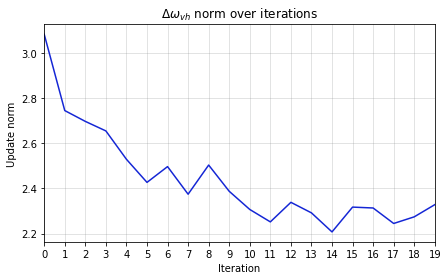

In [4]:
plt.figure(figsize=(7, 4)) 
plt.plot(range(n_iterations),delta_weight_vh_norm, color='#1426D5',label='$\Delta \omega_{vh}$ norm')
# plt.legend(loc='upper right', fontsize='10')
plt.grid(b=True, which='major', color='#8A8C8D', alpha=0.3, linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Update norm')
plt.xticks(range(0, n_iterations))
plt.xlim(0,n_iterations-1)
plt.title("$\Delta \omega_{vh}$ norm over iterations")
plt.savefig('figures/norm_delta_vh_iterations.pdf', dpi=1000.0)
plt.show()  

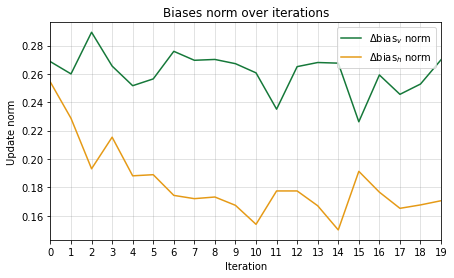

In [5]:
plt.figure(figsize=(7, 4)) 
plt.plot(range(n_iterations),delta_bias_v_norm, color='#157839',label='$\Delta$bias$_{v}$ norm')
plt.plot(range(n_iterations),delta_bias_h_norm, color='#E59A16',label='$\Delta$bias$_{h}$ norm')
plt.legend(loc='upper right', fontsize='10')
plt.grid(b=True, which='major', color='#8A8C8D', alpha=0.3, linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Update norm')
plt.xticks(range(0, n_iterations))
plt.xlim(0,n_iterations-1)
plt.title("Biases norm over iterations")
plt.savefig('figures/norm_bias_iterations.pdf', dpi=1000.0)
plt.show()  

In [6]:
n_units = np.arange(200, 501, 100)
n_iterations = 20

reconstruction_losses = []

for n in n_units:

  print("{} hidden units".format(n))
  
  rbm_comparison = RestrictedBoltzmannMachine(ndim_visible=image_size[0] * image_size[1],
                                 ndim_hidden=n,
                                 is_bottom=True,
                                 image_size=image_size,
                                 is_top=False,
                                 n_labels=10,
                                 batch_size=20
                                 )

  rec_losses, _, _, _ = rbm_comparison.cd1(visible_trainset=train_imgs, n_iterations=n_iterations)
  
  reconstruction_losses.append(rec_losses)

  print("______________")

200 hidden units
Learning CD1
Iteration = 0: recon_loss = 0.0888
Iteration = 1: recon_loss = 0.0867
Iteration = 2: recon_loss = 0.0909
Iteration = 3: recon_loss = 0.0850
Iteration = 4: recon_loss = 0.0758
Iteration = 5: recon_loss = 0.0849
Iteration = 6: recon_loss = 0.0842
Iteration = 7: recon_loss = 0.0766
Iteration = 8: recon_loss = 0.0683
Iteration = 9: recon_loss = 0.0799
Iteration = 10: recon_loss = 0.0745
Iteration = 11: recon_loss = 0.0688
Iteration = 12: recon_loss = 0.0634
Iteration = 13: recon_loss = 0.0654
Iteration = 14: recon_loss = 0.0634
Iteration = 15: recon_loss = 0.0623
Iteration = 16: recon_loss = 0.0600
Iteration = 17: recon_loss = 0.0574
Iteration = 18: recon_loss = 0.0557
Iteration = 19: recon_loss = 0.0572
______________
300 hidden units
Learning CD1
Iteration = 0: recon_loss = 0.0901
Iteration = 1: recon_loss = 0.0997
Iteration = 2: recon_loss = 0.0800
Iteration = 3: recon_loss = 0.0755
Iteration = 4: recon_loss = 0.0694
Iteration = 5: recon_loss = 0.0677
Itera

(4, 20)
[0.0887935645773581, 0.08673360194358426, 0.09087429026498586, 0.08504301733676706, 0.07581092108058969, 0.08494204367164152, 0.08415826219474515, 0.07658613987962619, 0.06832430692931613, 0.07994933634896678, 0.07454866992759838, 0.06876352762654757, 0.0633541098767586, 0.06542910430975139, 0.06335511848569786, 0.0622814961015917, 0.060032503344852946, 0.05740479526243823, 0.05566994964317397, 0.05718594723202596]


ValueError: x and y must have same first dimension, but have shapes (10,) and (20,)

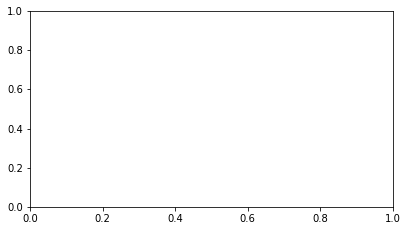

In [7]:
# print(np.shape(reconstruction_losses))
# print(reconstruction_losses[0])
n_iterations = 20
plt.figure(figsize=(6.5, 3.6)) 
plt.plot(range(n_iterations), reconstruction_losses[0], color='#15A54A',label='200 units')
plt.plot(range(n_iterations),reconstruction_losses[1], color='#E1690B',label='300 units')
plt.plot(range(n_iterations),reconstruction_losses[2], color='#176CBB',label='400 units')
plt.plot(range(n_iterations),reconstruction_losses[3], color='#EE1010',label='500 units')
plt.legend(loc='upper right', fontsize='10')
plt.grid(b=True, which='major', color='#8A8C8D', alpha=0.3, linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Reconstruction loss')
plt.xticks(range(0, n_iterations))
plt.xlim(0,n_iterations-1)
plt.title("Average reconstruction loss")
plt.savefig('figures/comparison_units_epochs.pdf', dpi=1000.0)
plt.show()  

c:\Users\Francisco Javier\OneDrive - Universidad Politécnica de Madrid\KTH\P3\DD2437_ANN-Deep-Architectures\Labs\Lab4\code\rbm.py:420: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\Francisco Javier\OneDrive - Universidad Politécnica de Madrid\KTH\P3\DD2437_ANN-Deep-Architectures\Labs\Lab4\code\rbm.py:420: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\Francisco Javier\OneDrive - Universidad Politécnica de Madrid\KTH\P3\DD2437_ANN-Deep-Architectures\Labs\Lab4\code\rbm.py:420: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\Francisco Javier\OneDrive - Universidad Politécnica de Madrid\KTH\P3\DD2437_ANN-Deep-Architectures\Labs\Lab4\code\rbm.py:420

The mean reconstructed loss is: 0.01233


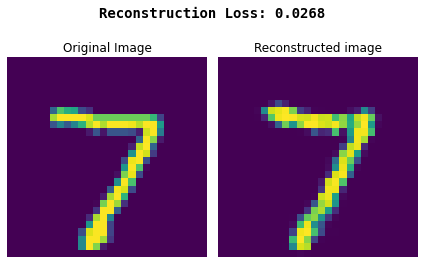

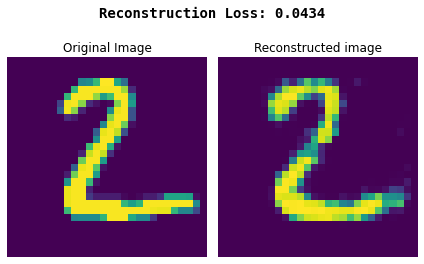

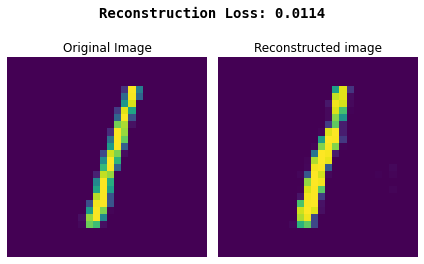

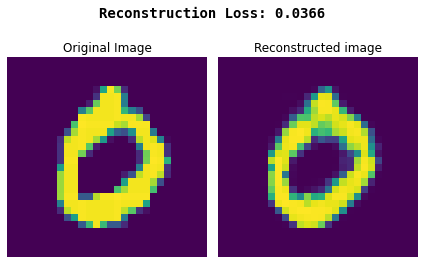

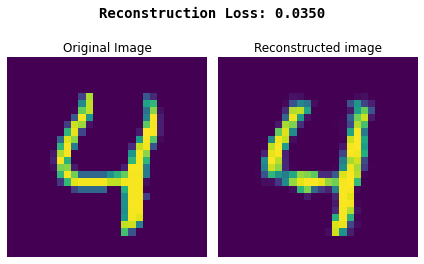

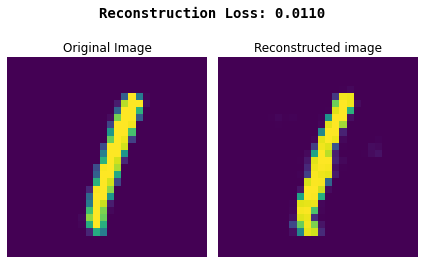

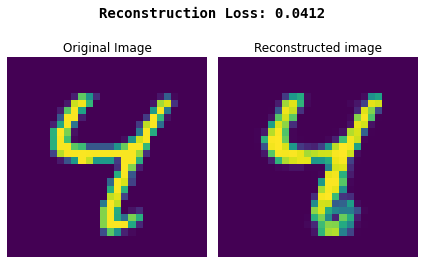

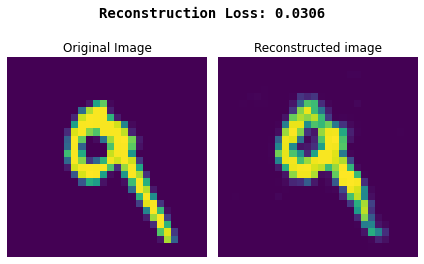

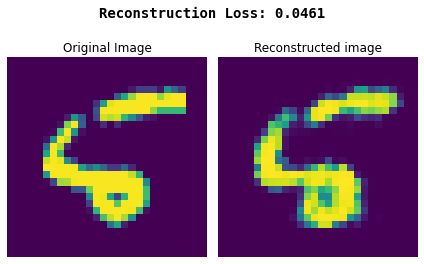

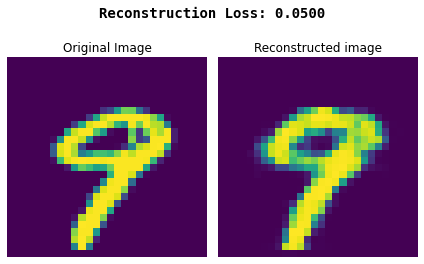

In [6]:
images = test_imgs[0:10][:]
image_size = [28, 28]

rbm.visualize_reconstruction(images, image_size)  

In [7]:
recon_losses = rbm.compute_reconstruction_losses(test_imgs)

print("The mean reconstructed loss is: {:.5f}".format(np.mean(losses)))

The mean reconstructed loss is: 0.01233
